# Hartley-Hoover-Salyer Real Business Cycle (RBC) Model
 
In this notebook, from the perspective of a benevolent social planner, I show the numerical solution of the log-linear version of the real business cycle (RBC) model of Hartley, J.; Hoover, K. and Salyer, K. (1998): User’s Guide to Solving Real Business Cycle Models. In: Hartley, J., Hoover, K. and Salyer, K. (eds.). Real Business Cycle: A Reading. London, Routledge. Using the “Linearsolve” module developed by Brian C. Jenkins (link: https://www.briancjenkins.com/linearsolve/docs/build/html/index.html), I numerically simulate the response of the artificial economy to: (i) a single-period productivity shock, (ii) a succession of random technology shocks. The detailed analytical development of this model and some numerical simulations executed in Dynare and Microsoft Excel can be found at the following link: https://sites.google.com/view/ciroeduardobazannavarro/teaching/lecture-notes-and-slides

## Hartley-Hoover-Salyer RBC Model
    
* **The equilibrium conditions for Hartley-Hoover-Salyer RBC model are:**

Goods market clearing (the economy-wide resource constraint)    
$$ Y_t = C_t + I_t $$

Constant-returns-to-scale production function
$$ Y_t = A_t K_t^{\alpha} L_t^{1 - \alpha} $$

Law of motion for the capital stock
$$ K_{t+1} = (1 - \delta) K_t + I_t $$

Intratemporal efficiency condition (the labor-leisure tradeoff)
$$ C_t = \left( \frac{1 - \alpha}{b} \right) A_t K_t^{\alpha} L_t^{-\alpha} = \left( \frac{1 - \alpha}{b} \right) \frac{Y_t}{L_t} $$

Intertemporal efficiency condition
$$ 1 = \beta \mathbb{E}_t \left\{ \frac{C_t}{C_{t+1}} \left[ (1 - \delta) + \alpha A_{t+1} K_{t+1}^{\alpha - 1} L_{t+1}^{1 - \alpha} \right] \right\} =\beta \mathbb{E}_t \left\{ \frac{C_t}{C_{t+1}} \left[ (1 - \delta) + \alpha \frac{Y_{t+1}}{K_{t+1}} \right] \right\} $$

Technology shock process
$$ ln A_{t+1} = \rho \ln A_t + \varepsilon_{t+1}^A $$
    
   where $\\epsilon_{t+1} \\sim \\mathcal{N}(0,\\sigma_A^2)\$. 
    
## Nonstochastic steady state:

$$ K_{SS} = 10.9 $$
$$ A_{SS} = 1 $$
$$ Y_{SS} = \left( \frac{\beta^{-1} - 1 + \delta}{\alpha} \right) K_{SS}\\\\\ $$
$$ I_{SS} = \delta K_{SS}\\\\\ $$
$$ C_{SS} = Y_{SS} - I_{SS}\\\\\ $$
$$ L_{SS} = K_{SS} \left[ \frac{b C_{SS} K_{SS}^{-\alpha}}{A_{SS}(1 - \alpha)} \right]^{-1/\alpha}\ $$
    
Given values for the parameters $ \beta $, $ \\b $, $ \alpha $, $ \delta $, $ \\K_{SS} $, and $ \\A_{SS} $, steady state values of $ \\Y_{SS} $, $ \\C_{SS} $, $ \\L_{SS} $, and $ \\I_{SS }$ are easily computed.
    
## Hartley-Hoover-Salyer log-linear RBC model
    
The log-linearized version (around non-stochastic stationary equilibrium) of the Hartley-Hoover-Salyer RBC model is as follows:

$$ \widetilde{K}_{t+1} \approx \left( \frac{Y_{SS}}{K_{SS}} \right) \widetilde{A}_t 
+ \left( \frac{Y_{SS} \alpha}{K_{SS}} + 1 - \delta \right) \widetilde{K}_t 
+ \left( \frac{Y_{SS} (1 - \alpha)}{K_{SS}} \right) \widetilde{L}_t 
- \left( \frac{C_{SS}}{K_{SS}} \right) \widetilde{C}_t \\ \tag{eq1} \\  $$ 
   $$ \widetilde{C}_t \approx \widetilde{A}_t + \alpha \widetilde{K}_t - \alpha \widetilde{L}_t \tag{eq2} \\ $$ 
    $$ \mathbb{E}_t(\widetilde{C}_{t+1}) - \widetilde{C}_t =\alpha \beta \left( \frac{Y_{SS}}{K_{SS}} \right) \mathbb{E}_t(\widetilde{A}_{t+1}) 
+ \alpha (\alpha - 1) \beta \left( \frac{Y_{SS}}{K_{SS}} \right) \mathbb{E}_t(K_{t+1}) 
- \alpha (\alpha - 1) \beta \left( \frac{Y_{SS}}{K_{SS}} \right) \mathbb{E}_t(\widetilde{L}_{t+1}) \tag{eq3} \\ $$ 
    $$ \widetilde{A}_{t+1} \approx \rho \widetilde{A}_t + \varepsilon_{t+1}^A\ \tag{eq4} \\ $$ 
    
To perform numerical simulations of the log-linear version of the RBC model, the same parameter values used by Hartley et al. (1998):

|  $$ \rho $$       | $$ \sigma_A $$      | $$ \beta $$  | $$ \\b $$     | $$ \alpha $$  | $$ \delta $$  |
|-------------------|---------------------|--------------|---------------|---------------|---------------|
| 0.95              | $ \sqrt{0.007} $    | 0.99         | 3.00          | 0.35          |  0.025        |
   


#  Simulating the log-linear RBC model with linearsolve by Jenkins (2024)

## Import Python libraries (numpy, pandas, linearsolve, matplotlib)

In [787]:
import numpy as np
import pandas as pd
import linearsolve as ls
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

## Store the parameters of the log-linearized RBC model.

In [788]:
parameters = pd.Series(dtype=float)
parameters['alpha'] = 0.36 
parameters['beta'] = 0.99
parameters['delta'] = 0.025 
parameters['rho'] = 0.95
parameters['b'] = 3
parameters['KSS'] = 10.9
parameters['ASS'] = 1 

## Function that evaluates the equilibrium conditions of the log-linearized RBC model

In [789]:
def equations(variables_forward, variables_current, parameters):
    # Parameters
    p = parameters

    # Variables
    fwd = variables_forward
    cur = variables_current

    KSS=10.9
    YSS=(((p.beta)**(-1)-1+p.delta)/p.alpha)*p.KSS
    CSS=YSS-p.delta*p.KSS
    LSS=(CSS*(p.b/((1-p.alpha)*p.ASS))*p.KSS**(-p.alpha))**(-1/p.alpha)

    eq1 = cur.C-p.alpha*(cur.K-cur.L)-cur.A
    eq2= -cur.C+fwd.C-p.alpha*p.beta*(YSS/KSS)*fwd.A-p.alpha*(p.alpha-1)*p.beta*(YSS/KSS)*(fwd.K-fwd.L)
    eq3= fwd.K-(YSS/KSS)*cur.A-(YSS*p.alpha/KSS+1-p.delta)*cur.K-(YSS/KSS)*(1-p.alpha)*cur.L+(CSS/KSS)*cur.C
    eq4= p.rho * cur.A - fwd.A

    
    # Stack equilibrium conditions into a numpy array
    return np.array([eq1, eq2, eq3, eq4])

## Initialize the log-linearized RBC model

In [790]:
model = ls.model(equations=equations, exo_states = ['A'], endo_states=['K'], costates=['L','C'], shock_names=['e_A'], parameters=parameters)

## Numerically calculate the steady state of the log-linearized RBC model

In [791]:
guess = [1, 1, 1, 1]
model.compute_ss(guess)
print(model.ss)

A    2.964394e-323
K   -4.940656e-324
L   -2.964394e-323
C    3.952525e-323
dtype: float64


## Find the linear approximation around the non-stochastic steady state and solve

In [792]:
model.approximate_and_solve()

## Simulate impulse-response functions

Simulate, over a period of $ T=81 $ time units, the responses of the  model variables to a productivity shock (of magnitude $ \sigma_A = \sqrt{0.007} $) that hits the economy (in steady state before the productivity shock) during a single period (the productivity shock occurs in the initial period $ t_0=0 $).

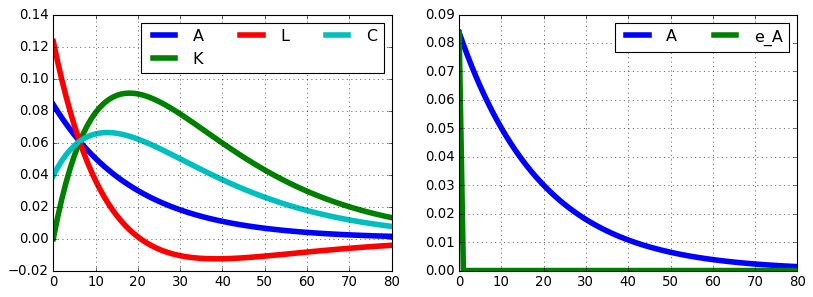

In [793]:
model.impulse(T=81,t0=0,shocks={'e_A':(0.007)**0.5},normalize=False)

fig = plt.figure(figsize=(12,4))
ax1 =fig.add_subplot(1,2,1)
(model.irs['e_A'][['A','K','L','C']]).plot(lw='5',grid=True,ax=ax1).legend(loc='upper right',ncol=3)
ax2 =fig.add_subplot(1,2,2)
(model.irs['e_A'][['A','e_A']]).plot(lw='5',grid=True,ax=ax2).legend(loc='upper right',ncol=2)

## Stochastic Simulation

Next, it is created a $ T=401 $  period (including t=0) simulation by first simulating the model for 551 periods and then dropping the first 150 values. The standard deviation of successive productivity shocks is set to $ \sqrt{0.007} $. Following Jenkins (2024), the seed for the numpy random number generator is set to 140000.

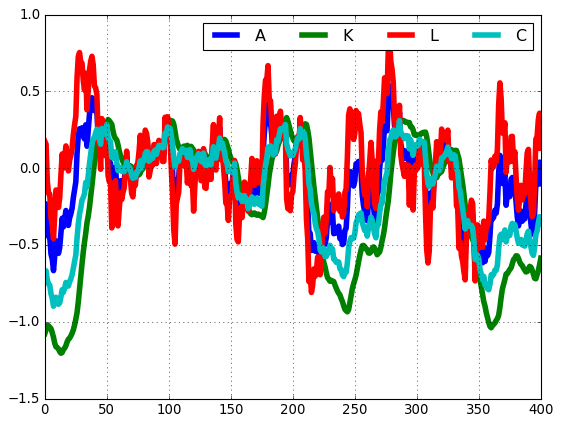

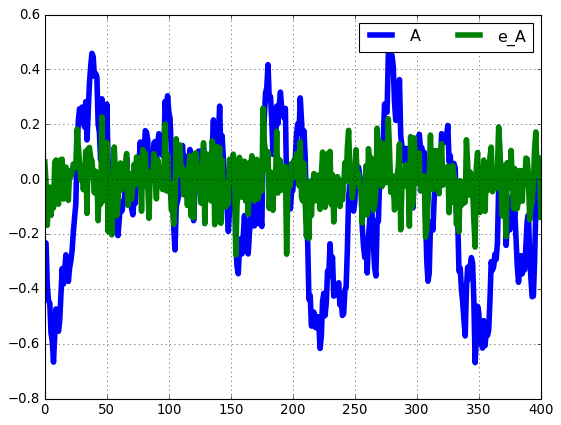

In [794]:
model.stoch_sim(T=401,drop_first=150,covariance_matrix=np.array([0.007]),seed=140000, normalize=False)
model.simulated[['A','K','L','C']].plot(linewidth='5', grid=True).legend(loc='upper right',ncol=4)
model.simulated[['A']].plot(linewidth='5',grid=True).legend(ncol=4)
model.simulated['e_A'].plot(linewidth='5',grid=True).legend(ncol=4)

plt.show()

# Bibliographic references

* Bazán, C.; Larios, J.; Mougenot, B. & Almerco, J. (2021). Modelos de macroeconomía dinámica Fondo editorial USIL. https://fondoeditorialusil1719871532.publica.la/library/publication/modelos-de-macroeconomia-dinamica-1726782148

* Hartley, J.; Hoover, K. & Salyer, K. (1998). A user guide to solving real business cycle models. In: Hartley, J., Hoover, K. & Salyer, K. (eds.). Real business cycle: a reader. London, Routledge.

* Jenkins, B. (2024): Linearsolve: A Python module for solving linear dynamic models using Klein's (2000) method and creating custom simulations, https://github.com/letsgoexploring/linearsolve
